In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets load the data in df variable

In [3]:
df = pd.read_csv("/content/Telecom_churn_rate.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- The dataset contains 7043 customers and 21 features.
- each row represent a unique customer with various features


In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


- since 'TotalCharges' is stored as object, which means it represent a numerical values but may be showing an error. it may contain missing values or be formated incorrectly . so letts check.

In [8]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [9]:
# so there are no missing values - lets change it to numeric

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = "coerce")

In [11]:
df['TotalCharges'].dtypes

dtype('float64')

In [12]:
#lets check for missing values in dataset

In [13]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- only one columns 'TotalCharges' has missing values (11 entries)
- possible ways to handle missing values
- fill them with median
- fill them with zero
- drop these 11 rows
-  so better way we replace with median

In [14]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [15]:
df['TotalCharges'].median()

1397.475

In [16]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)

<ipython-input-16-eaec19e0ee9d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)


In [17]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [18]:
#lets check for senior setizens also

In [19]:
df['SeniorCitizen'].unique()

array([0, 1])

In [20]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:"Yes", 0:"No"})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# lets check all the object columns for is there extra spaces
#, qutations are avaliable or not

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
categorical_column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',  'Churn']

In [26]:
NAME = 'Rahul'
age = 33
print(NAME,"age is",age)
print(f"{NAME} age is {age}")

Rahul age is 33
Rahul age is 33


In [27]:
for i in categorical_column:
  print(f"Unique Values in {i} is", df[i].unique(),"\n")

Unique Values in gender is ['Female' 'Male'] 

Unique Values in SeniorCitizen is ['No' 'Yes'] 

Unique Values in Partner is ['Yes' 'No'] 

Unique Values in Dependents is ['No' 'Yes'] 

Unique Values in PhoneService is ['No' 'Yes'] 

Unique Values in MultipleLines is ['No phone service' 'No' 'Yes'] 

Unique Values in InternetService is ['DSL' 'Fiber optic' 'No'] 

Unique Values in OnlineSecurity is ['No' 'Yes' 'No internet service'] 

Unique Values in OnlineBackup is ['Yes' 'No' 'No internet service'] 

Unique Values in DeviceProtection is ['No' 'Yes' 'No internet service'] 

Unique Values in TechSupport is ['No' 'Yes' 'No internet service'] 

Unique Values in StreamingTV is ['No' 'Yes' 'No internet service'] 

Unique Values in StreamingMovies is ['No' 'Yes' 'No internet service'] 

Unique Values in Contract is ['Month-to-month' 'One year' 'Two year'] 

Unique Values in PaperlessBilling is ['Yes' 'No'] 

Unique Values in PaymentMethod is ['Electronic check' 'Mailed check' 'Bank transfer

In [28]:
#lets check for the distribution of numeric feature

In [29]:
# lets check the outlier using box plot

Text(0.5, 1.0, 'Total Charges Boxplot')

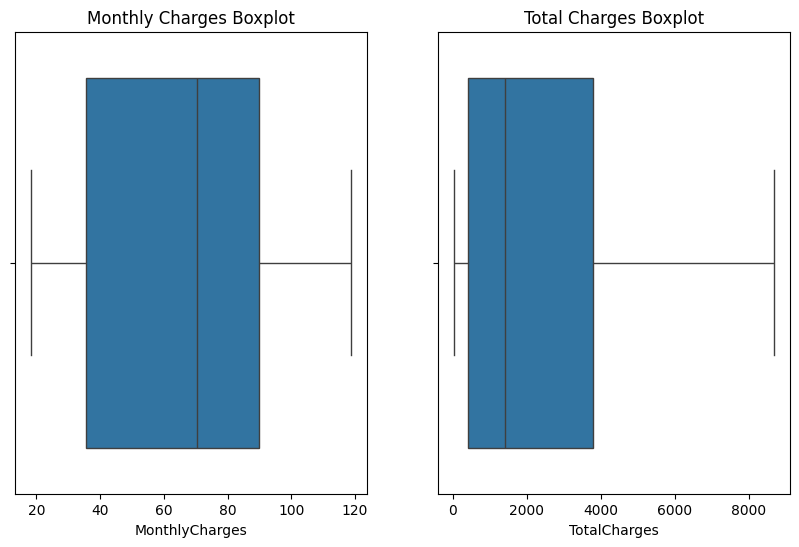

In [30]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data = df, x='MonthlyCharges')
plt.title("Monthly Charges Boxplot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x='TotalCharges')
plt.title("Total Charges Boxplot")


In [31]:
# lets describe all numerical feature

In [32]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2281.916928,64.761692,32.371149
std,2265.270398,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [33]:
df['tenure'].median()

29.0

In [34]:
# to understand the distribution of tenure we can visualise by histogram

Text(0, 0.5, 'Frequency')

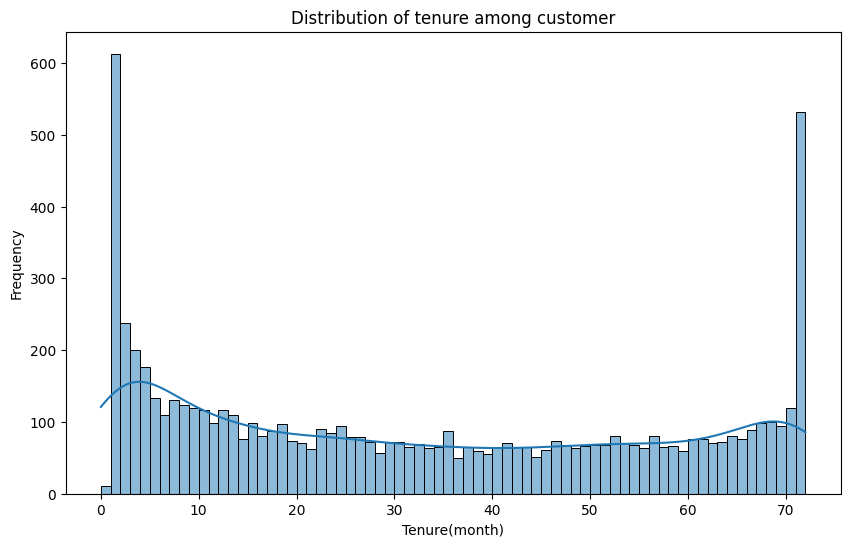

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'tenure' ,kde= True, bins = 72)
plt.title("Distribution of tenure among customer")
plt.xlabel("Tenure(month)")
plt.ylabel("Frequency")

Insights -
- The fact that distribution look like uniform  - that mean the customers distributed uniformly among all tenure periods

- In the distributions its showing the maximum customers count in first month may be because of the new customers entry in every first month, and maximum count shoing for 72 month that mean may be there was a discount for 6year subscription

In [36]:
# check for the monthly charges and the total charges distribution

Text(0, 0.5, 'Frequency')

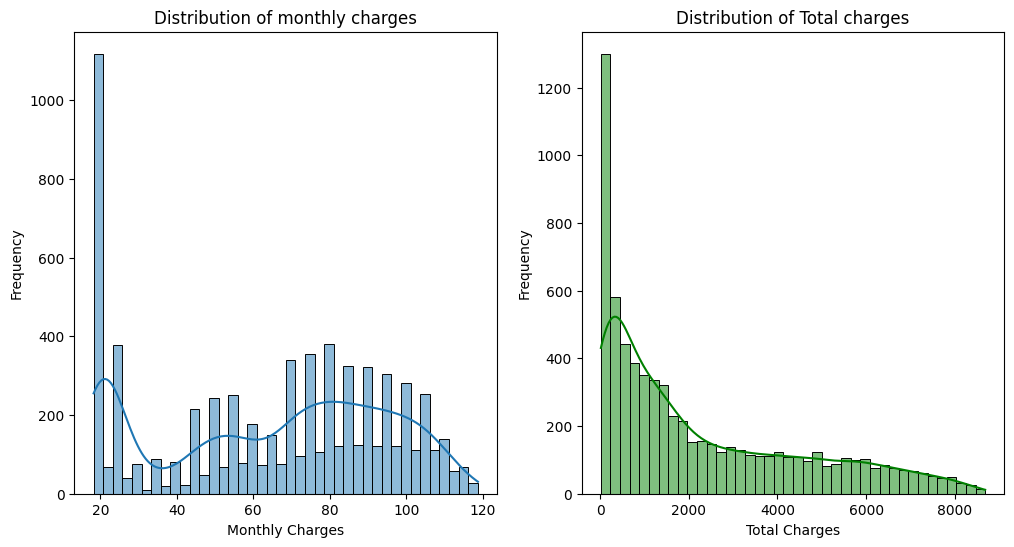

In [37]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='MonthlyCharges', kde=True , bins=40 )
plt.title("Distribution of monthly charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
sns.histplot(data=df, x='TotalCharges', kde=True , bins=40 , color='g' )
plt.title("Distribution of Total charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")

In [38]:
# 12 - check for the categories in contract type

In [39]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [40]:
contract_count = df['Contract'].value_counts()

In [41]:
contract_count

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


<Axes: xlabel='Contract'>

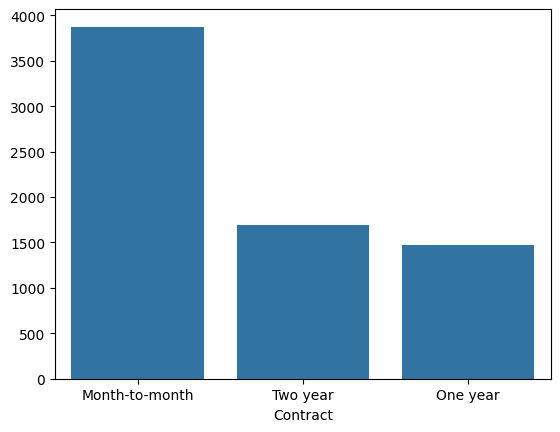

In [42]:
sns.barplot(x= contract_count.index, y=contract_count.values)

In [43]:
contract_count = df.groupby(['Contract','Churn']).size().unstack()

In [44]:
contract_count

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<Axes: xlabel='Contract', ylabel='count'>

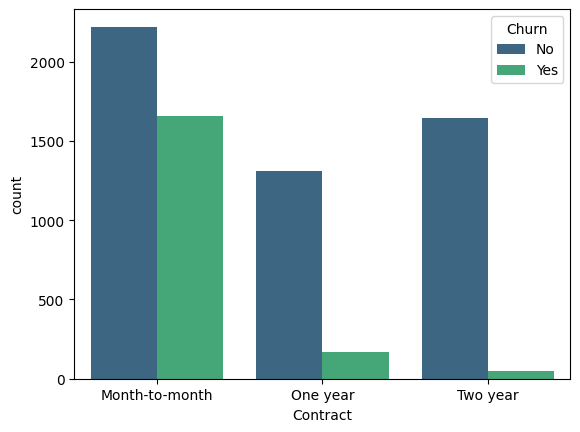

In [45]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')

Insights
Majority customer churn rate is in month to month contract

Business Implication  - Month to month contract may need disounts or incentives to commit to a longer contract -
- we provide some rewards or gift hampers for longer customers
- coupon code for 1year contract
- offer for services

In [46]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [47]:
# lets check for the senior citizens

In [48]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
count_sr_citizens = df['SeniorCitizen'].value_counts()

In [50]:
count_sr_citizens

,count
SeniorCitizen,
No,5901
Yes,1142


In [51]:
len(df)

7043

In [52]:
sr_cit_percent = (count_sr_citizens / len(df))*100

In [53]:
sr_cit_percent

,count
SeniorCitizen,
No,83.785319
Yes,16.214681


([<matplotlib.patches.Wedge at 0x7e819c1fead0>,
 [Text(-0.9603414716655103, 0.5364179879527924, 'No'),
  Text(0.9603413906686367, -0.5364181329603142, 'Yes')],
 [Text(-0.5238226209084601, 0.2925916297924322, '83.79%'),
  Text(0.5238225767283472, -0.29259170888744407, '16.21%')])

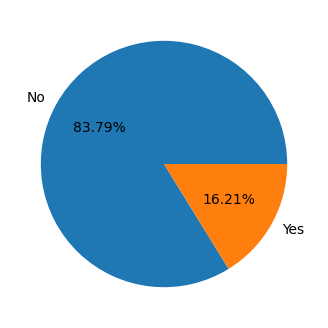

In [54]:
plt.figure(figsize=(4,4))
plt.pie(sr_cit_percent.values , labels= sr_cit_percent.index,
        autopct= '%1.2f%%')

In [55]:
#customer preportions with and without partner

In [56]:
count_partners = df['Partner'].value_counts(normalize=True)*100

In [57]:
count_partners

,proportion
Partner,
No,51.69672
Yes,48.30328


([<matplotlib.patches.Wedge at 0x7e819bffec10>,
 [Text(-0.05860663822931854, 1.0984376459114362, 'Without Partner'),
  Text(0.058606865201761345, -1.098437633801402, 'With Partner')],
 [Text(-0.031967257215991925, 0.5991478068607834, '51.70%'),
  Text(0.031967381019142545, -0.5991478002553101, '48.30%')])

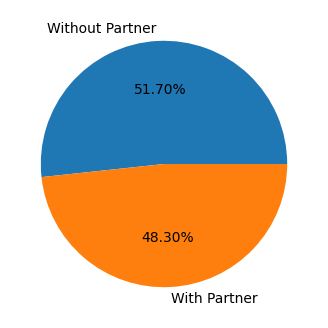

In [58]:
plt.figure(figsize=(4,4))
plt.pie(count_partners.values , labels= ["Without Partner", "With Partner"],
        autopct= '%1.2f%%')

In [59]:
#lets check for the internet service users

In [60]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [61]:
count_internet_service = df['InternetService'].value_counts()

In [62]:
count_internet_service

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


<ipython-input-63-548b89425cfd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_internet_service.index, y = count_internet_service.values,


<Axes: xlabel='InternetService'>

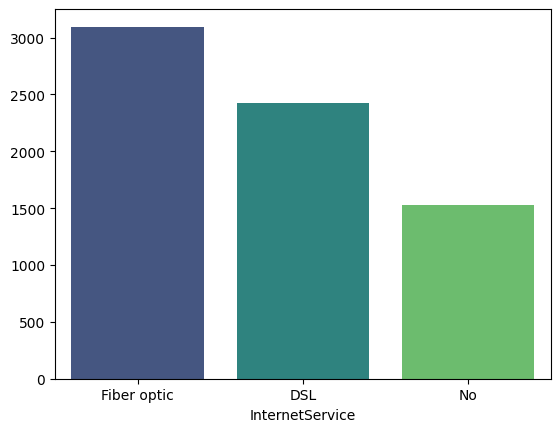

In [63]:
sns.barplot(x=count_internet_service.index, y = count_internet_service.values,
            palette="viridis")

<ipython-input-64-f599ccac2621>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x="InternetService" , palette="viridis")


<Axes: xlabel='InternetService', ylabel='count'>

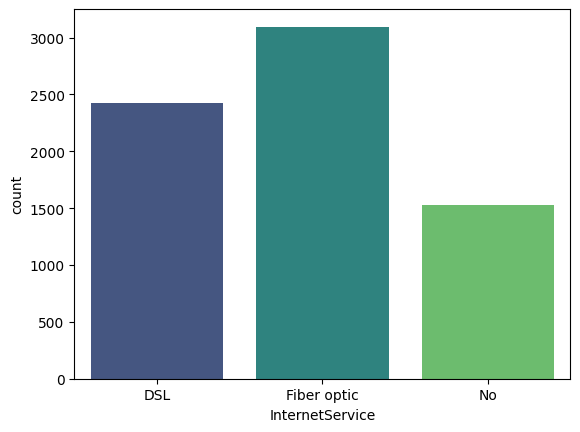

In [64]:
sns.countplot(data = df, x="InternetService" , palette="viridis")

In [65]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
df["InternetUser"] = df['InternetService'].apply(lambda x : "Yes" if x in ["DSL", "Fiber optic"] else "No")

In [67]:
df["InternetUser"].value_counts()

,count
InternetUser,
Yes,5517
No,1526


In [68]:
df['InternetUser1'] = np.where(df['InternetService'] == "No", "No", "Yes")

In [69]:
df['InternetUser1'].value_counts()

,count
InternetUser1,
Yes,5517
No,1526


In [70]:
df['InternetUser2'] = df['InternetService'].replace(
    {"DSL":"Yes", "Fiber optic":"Yes", "No":"No"}
)

In [71]:
df['InternetUser2'].value_counts()

,count
InternetUser2,
Yes,5517
No,1526


In [72]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetUser', 'InternetUser1', 'InternetUser2'],
      dtype='object')

In [73]:
df.drop(columns=['InternetUser', 'InternetUser1', 'InternetUser2'], inplace=True)

In [74]:
#lets start with churn analysis.

In [75]:
#overall churn rate

In [76]:
churn_rate = df['Churn'].value_counts(normalize=True)*100

In [77]:
churn_rate

,proportion
Churn,
No,73.463013
Yes,26.536987


([<matplotlib.patches.Wedge at 0x7e819bdaead0>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.46%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.54%')])

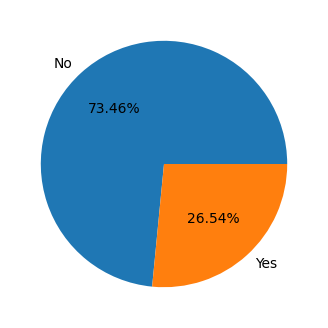

In [78]:
plt.figure(figsize=(4,4))
plt.pie(churn_rate.values , labels=churn_rate.index, autopct="%1.2f%%")

In [79]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()*100

In [80]:
contract_churn['Yes']

,Yes
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


In [81]:
contract_churn.index

Index(['Month-to-month', 'One year', 'Two year'], dtype='object', name='Contract')

In [82]:
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [83]:
contract_churn['Yes']

,Yes
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


<ipython-input-84-f3c02cd19420>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = contract_churn.index , y=contract_churn['Yes'],


([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

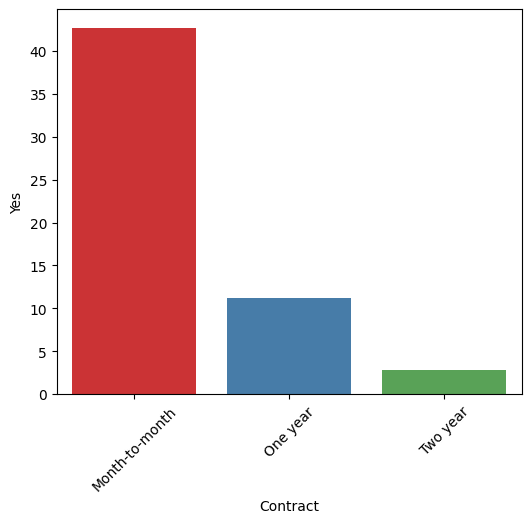

In [84]:
plt.figure(figsize=(6,5))
sns.barplot(x = contract_churn.index , y=contract_churn['Yes'],
            palette="Set1")
plt.xticks(rotation=45)

In [85]:
paperless_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()*100

In [86]:
paperless_churn

Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


<ipython-input-87-33d9ac5504e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = paperless_churn.index , y=paperless_churn['Yes'],


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

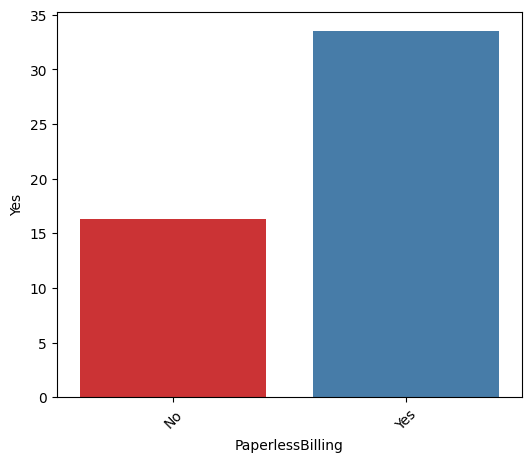

In [87]:
plt.figure(figsize=(6,5))
sns.barplot(x = paperless_churn.index , y=paperless_churn['Yes'],
            palette="Set1")
plt.xticks(rotation=45)

In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [89]:
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()*100

In [90]:
gender_churn

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


<ipython-input-91-124b6e36fa2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_churn.index , y=gender_churn['Yes'],


([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

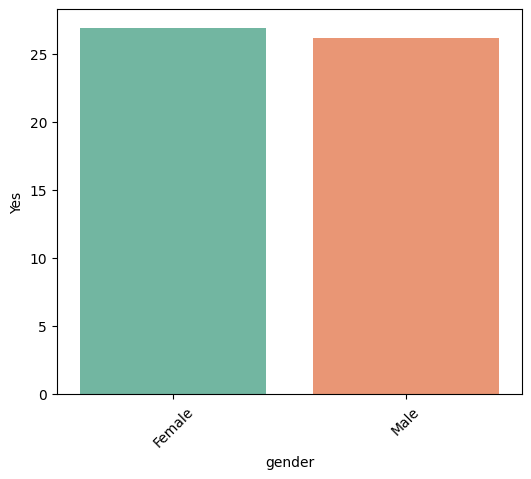

In [91]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_churn.index , y=gender_churn['Yes'],
            palette="Set2")
plt.xticks(rotation=45)

In [92]:
# How does churn correlate with MonthlyCharges and TotalCharge

In [93]:
df['New_Churn'] = df['Churn'].replace({"Yes":1 , "No":0 })

<ipython-input-93-344a55bf42df>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['New_Churn'] = df['Churn'].replace({"Yes":1 , "No":0 })


In [94]:
correlation_matrix = df[['TotalCharges', "MonthlyCharges", "New_Churn"]].corr()

In [95]:
correlation_matrix

,TotalCharges,MonthlyCharges,New_Churn
TotalCharges,1.000000,0.650864,-0.199037
MonthlyCharges,0.650864,1.000000,0.193356
New_Churn,-0.199037,0.193356,1.000000


<Axes: >

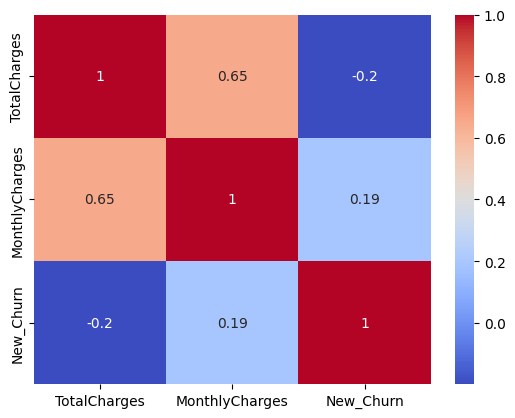

In [96]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

#avg_tenure churn rate

In [97]:
avg_tenure = df.groupby("Churn")['tenure'].mean()

In [98]:
avg_tenure

,tenure
Churn,
No,37.569965
Yes,17.979133


<ipython-input-99-b737e2a398dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tenure.index, y=avg_tenure.values, palette='rocket')


Text(0.5, 1.0, 'Avg tenure Churn vs non churn')

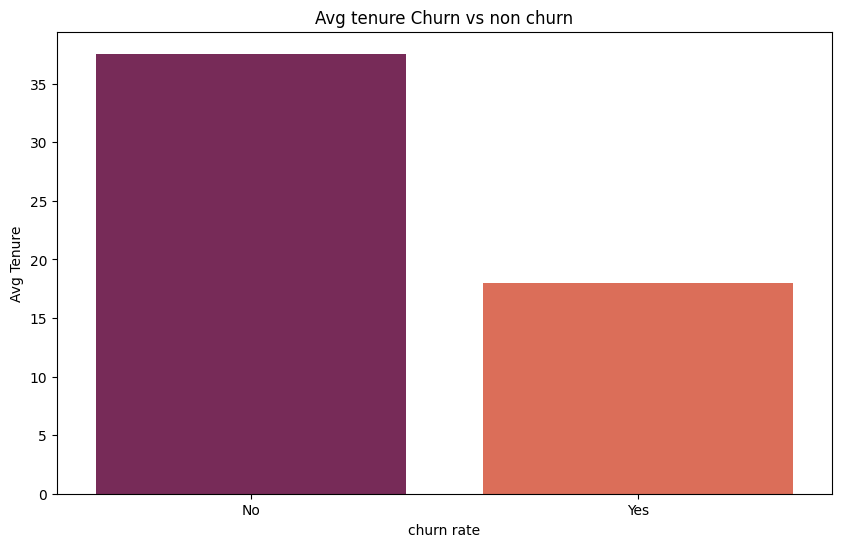

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_tenure.index, y=avg_tenure.values, palette='rocket')
plt.xlabel("churn rate")
plt.ylabel("Avg Tenure")
plt.title("Avg tenure Churn vs non churn")

# tech support churn

In [100]:
tech_support_churn = df.groupby("TechSupport")['Churn'].value_counts().unstack()

In [101]:
tech_support_churn

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Text(0.5, 1.0, 'TechSupport by churn vs non-churn customer')

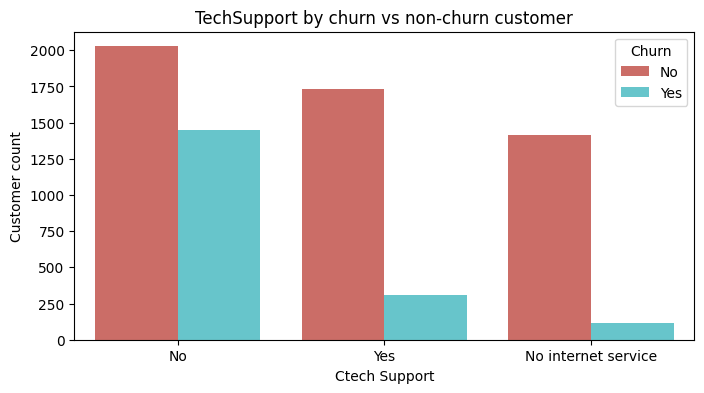

In [102]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='hls')
plt.ylabel("Customer count")
plt.xlabel("Ctech Support")
plt.title("TechSupport by churn vs non-churn customer")

In [103]:
df.groupby("TechSupport")['Churn'].value_counts(normalize=True).unstack()*100

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


# Streaming tv and movie

In [104]:
StreamingTV_churn = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack()*100

In [105]:
StreamingTV_churn

Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


In [106]:
Streaming_movies_churn = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack()*100

In [107]:
Streaming_movies_churn

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


Text(0.5, 1.0, 'StreamingMovies by churn vs non-churn customer')

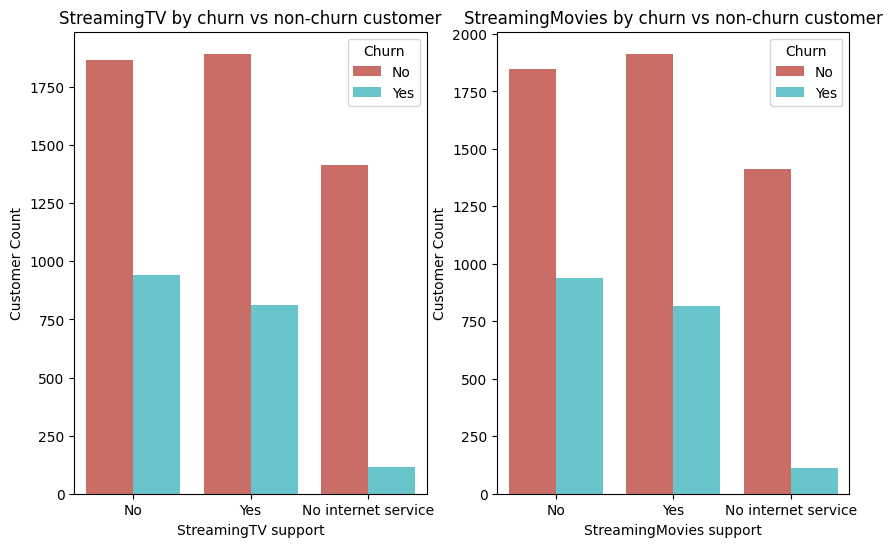

In [108]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data=df , x='StreamingTV' , hue='Churn' , palette='hls' )
plt.ylabel("Customer Count")
plt.xlabel("StreamingTV support")
plt.title("StreamingTV by churn vs non-churn customer")

plt.subplot(1,2,2)
sns.countplot(data=df , x='StreamingMovies' , hue='Churn' , palette='hls' )
plt.ylabel("Customer Count")
plt.xlabel("StreamingMovies support")
plt.title("StreamingMovies by churn vs non-churn customer")

# Multiple_Lines_churn

In [109]:
MultipleLines_churn = df.groupby("MultipleLines")['Churn'].value_counts(normalize=True).unstack()*100

In [110]:
MultipleLines_churn

Churn,No,Yes
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


Text(0.5, 1.0, 'MultipleLines by churn vs non-churn customer')

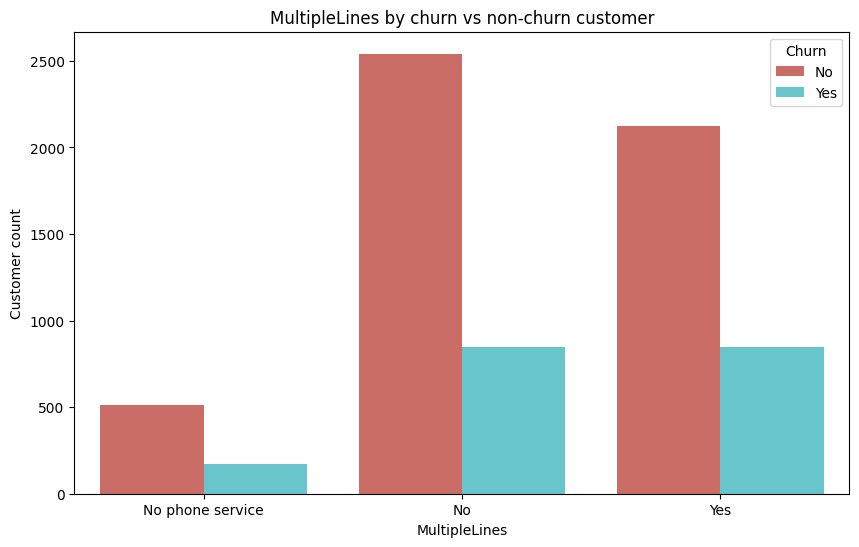

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(data=df , x='MultipleLines' , hue='Churn', palette='hls')
plt.ylabel("Customer count")
plt.xlabel("MultipleLines")
plt.title("MultipleLines by churn vs non-churn customer")

# which payment method has highest churn rate

In [112]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [113]:
Payment_churn = df.groupby("PaymentMethod")['Churn'].value_counts(normalize=True).unstack()*100

In [114]:
Payment_churn

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

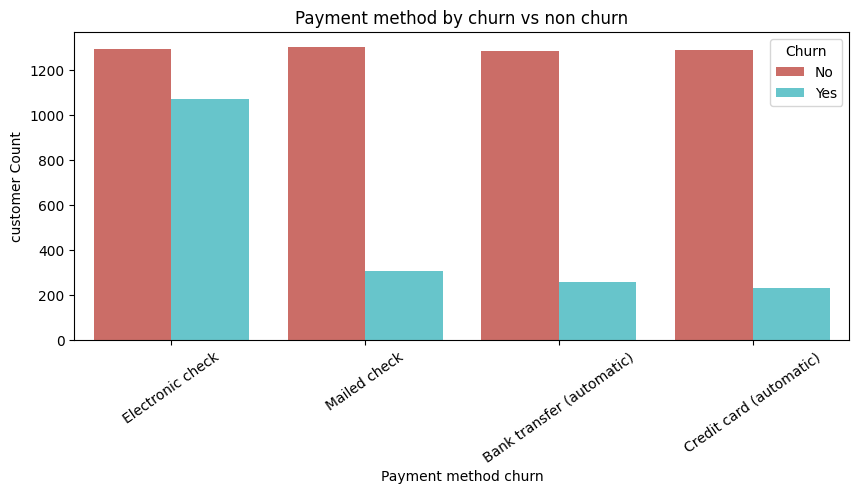

In [115]:
plt.figure(figsize=(10,4))
sns.countplot(data=df , x='PaymentMethod' , hue='Churn', palette='hls')
plt.ylabel("customer Count")
plt.xlabel("Payment method churn")
plt.title("Payment method by churn vs non churn")

plt.xticks(rotation=35)

# Dependent less likely to churn

In [116]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [117]:
dependent_churn = df.groupby("Dependents")['Churn'].value_counts().unstack()

In [118]:
dependent_churn

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [121]:
df.groupby("Dependents")['Churn'].value_counts(normalize=True).unstack()*100

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

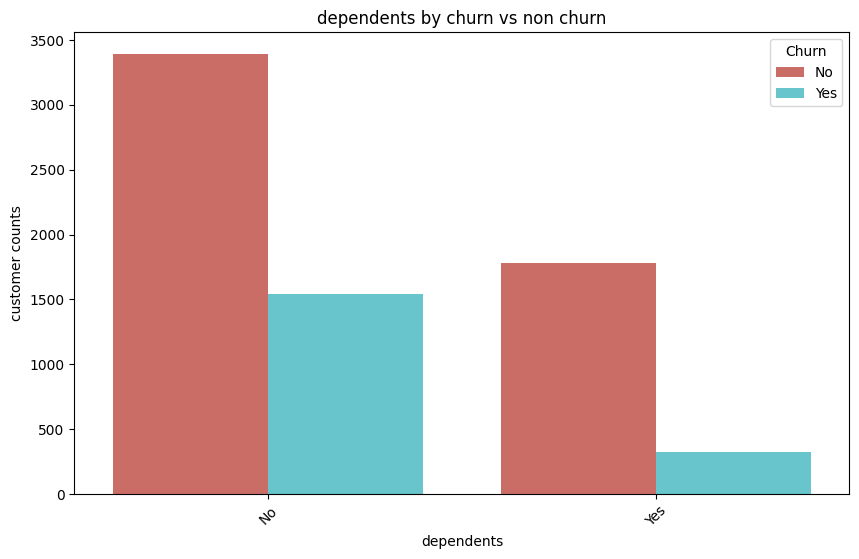

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(data = df , x='Dependents', hue='Churn', palette='hls')
plt.xlabel("dependents")
plt.ylabel("customer counts")
plt.title("dependents by churn vs non churn")
plt.xticks(rotation=45)

# Senior and non senior customer with respective churn

In [125]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [127]:
senior_churn=df.groupby("SeniorCitizen")['Churn'].value_counts().unstack()*100

In [128]:
senior_churn

Churn,No,Yes
SeniorCitizen,,
No,450800,139300
Yes,66600,47600


In [129]:
df.groupby("SeniorCitizen")['Churn'].value_counts(normalize=True).unstack()*100

Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


AttributeError: module 'matplotlib.pyplot' has no attribute 'lable'

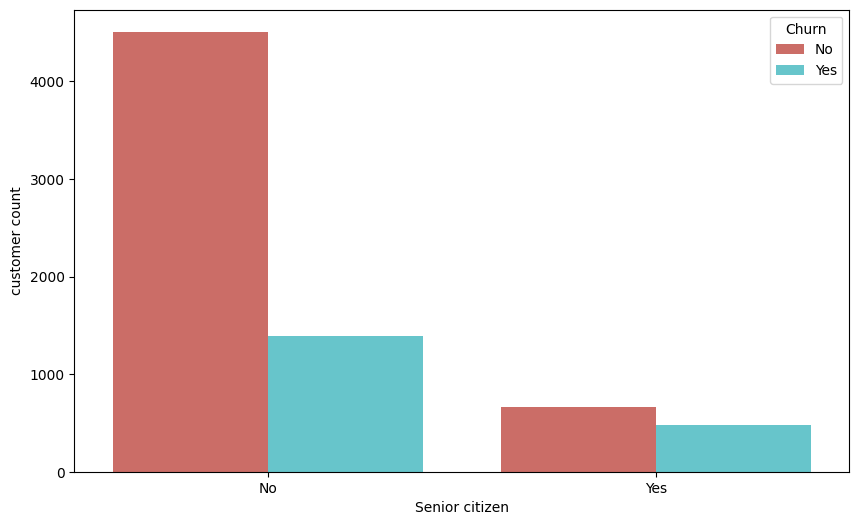

In [131]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='SeniorCitizen', hue='Churn', palette='hls')
plt.ylabel("customer count")
plt.xlabel("Senior citizen")
plt.lable("senior citizen churn rate")

# Correlation between numerical feature

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [134]:
corr_matrix = df.corr(numeric_only=True)

In [135]:
corr_matrix

,tenure,MonthlyCharges,TotalCharges,New_Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
New_Churn,-0.352229,0.193356,-0.199037,1.000000


In [137]:
df_numerical = df[['tenure' , 'MonthlyCharges', 'TotalCharges']]

In [139]:
corr_matrix1=df_numerical.corr()

In [140]:
corr_matrix1

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000
